# Instruções da prova

- O único material que poderá ser consultado é este notebook, consultas à outros materiais ou à internet será considerado cola
- Renomear o notebook para C209_PV1L1_NOME_SOBRENOME_MATRICULA
- Enviar no teams a pasta com todas as mídias zipada com o nome "NOME_SOBRENOME_MATRICULA.zip"

# Parte teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas

1 - O espaço de cores RGB é amplamente utilizado pois é o mais intuitivo para seres humanos

In [ ]:
#F. O RGB é mais usado pois as principais cores que o RGB pode produzir são mais difíceis de reproduzir no CMYK.

2 - Imagens vetoriais apresentam serrilhamento quando são ampliadas

In [ ]:
#F - Imagens Matriciais apresentam serrilhamento quando são ampliadas

3 - A lógica XOR aplicada em uma imagem detecta os pixels que mudaram de valor

In [ ]:
#V

4 - O código abaixo representa um circulo com 110px de altura, 128px de largura e rotacionado em 64 graus.

```<circle cx='110' cy='128' r='64' fill='red'/>```

In [ ]:
#V

5 - Algumas imagens podem ter um quarto canal chamado Alpha que representa a opacidade do pixel

In [ ]:
#F.O canal Alpha não representa a opacidade do pixel. Ele tem o objetivo de representar transparência.

# Parte prática

## Material de apoio

### Importações

```
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

### Manipulação de imagens

```
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')
(l,c,p) = img.shape
```

### Greyscale

#### Algoritmo genérico, substituir o método escolhido
```
img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (aplicar método)
```

#### Métodos: 

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$

### Escalonamento com nearest neighbor

```
ls, cs = l * sy, c * sx
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        mario_nn[i, j] = mario[new_y, new_x]
```

### Cisalhamento

```
img_shear = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = int(j + cx * i)
        new_y = int(cy * j + i)
        
        img_shear[new_y, new_x] = img[i, j]
```

### Imagem grayscale para imagem binária de 3 canais

``` 
bin = np.zeros(shape=(l,c,3),dtype=np.uint8)
    
for i in range(l):
    for j in range(c):
        if img[i,j] > thresh: 
            bin[i,j,:] = 255 
        else: 
            bin[i,j,:] = 0

```

**1 -** Importe as bibliotecas que serão usadas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**2 -** Abra as imagens horse.jpg e landscape.jpg, retire o canal alpha se necessário, exiba essas imagens e mostre o formato de cada uma

(768, 1024, 3)
(384, 512, 3)


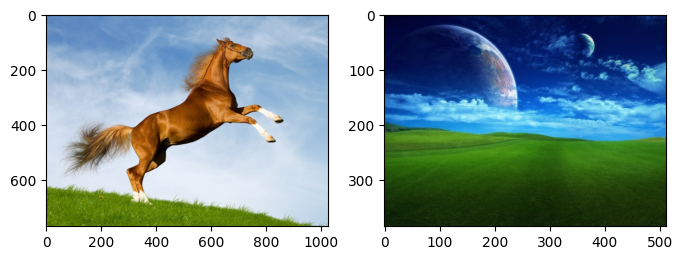

In [2]:
img_1 = np.array(Image.open('horse.jpg'))
print(img_1.shape) #Imprime o valor matricial [768,1024, 3] -----> Não há canal alfa

img_2 = np.array(Image.open('landscape.jpg'))
print(img_2.shape) #Imprime o valor matricial [384, 512, 3] -----> Não há canal alfa

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_1)
plt.subplot(2, 2, 2)
plt.imshow(img_2)

**3 -** Crie uma função que realize o escalonamento de uma imagem que receba como parâmetro uma **imagem, sx e sy**, sendo sx e sy os fatores de escalonamento e **retorne a imagem escalonada**, em seguida aplique o escalonamento na imagem "landscape" para que fique do mesmo tamanho da imagem "horse". Exiba o resultado.

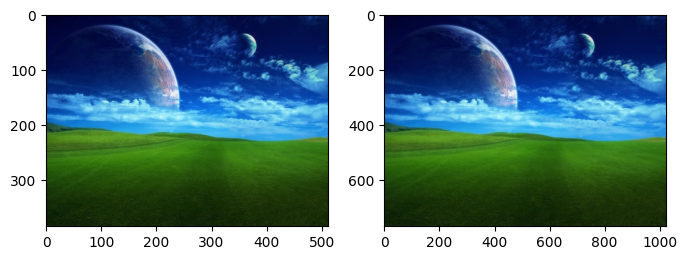

In [3]:
def escalonamento (img, sx, sy):

    (l,c,p) = img.shape
    ls, cs = l * sy, c * sx
    img_escl = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

    for i in range(ls):
        for j in range(cs):
            new_y = int(np.floor(i * (l / ls)))
            new_x = int(np.floor(j * (c / cs)))
    
            img_escl[i, j] = img[new_y, new_x]
    return img_escl

result = escalonamento(img_2,2,2) 

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_2)
plt.subplot(2, 2, 2)
plt.imshow(result)

**4 -** Crie uma função para aplicar um método grayscale de sua escolha, que receba como **parâmetro uma imagem e retorne uma imagem em greyscale**. Aplique essa função na **imagem "horse"** e mostre o resultado.

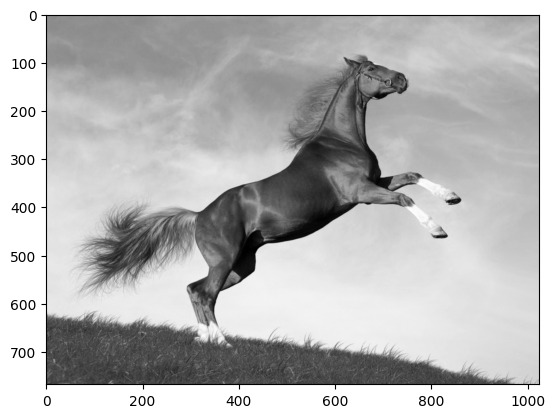

In [4]:
def grayscale(img):
    
    (l,c,p) = img.shape
    img_gray = np.zeros(shape=(l, c), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            r = float(img[i, j, 0])
            g = float(img[i, j, 1])
            b = float(img[i, j, 2])
            img_gray[i, j] = (r + g + b) / 3
            
    return img_gray

image_gray = grayscale(img_1)
plt.imshow(image_gray, cmap = 'gray')

**5 -** Crie uma função para transformar uma imagem grayscale em uma imagem binária, que receba como **parâmetro uma imagem e o threshhold** para realizar a operação e retorne uma imagem binária. Aplique essa função na imagem resultante da **etapa anterior com threshold de valor 135** e mostre o resultado.

(768, 1024)


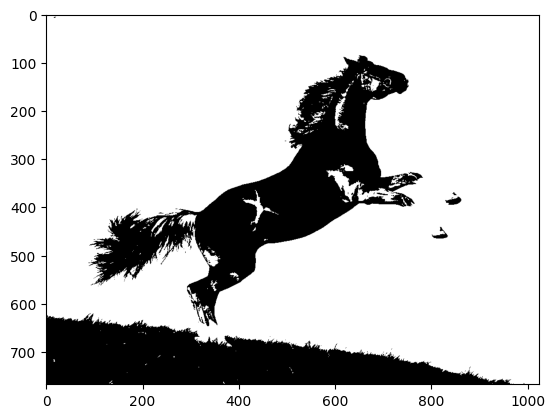

In [5]:
def threshold(img, thresh):
    
    (l,c) = img.shape
    print(img.shape)
    img_bin = np.zeros(shape=(l,c,3),dtype=np.uint8)

    for i in range(l):
        for j in range(c):
            if img[i,j] > thresh: 
                img_bin[i,j,:] = 255 
            else: 
                img_bin[i,j,:] = 0
    return img_bin


bin2 = threshold(image_gray, 135)
plt.imshow(bin2, cmap='gray')

**6 -** Realize a operação NOT com a imagem da **etapa anterior** e mostre o resultado

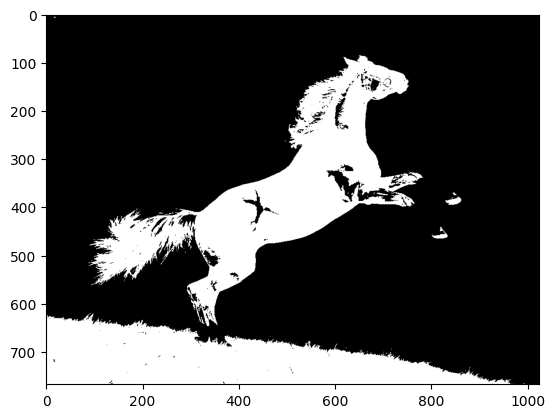

In [6]:
bin_not = np.invert(bin2)
plt.imshow(bin_not, cmap='gray')

**7 -** Aplique a imagem da **questão anterior como uma máscara (Lógica E) com a imagem resultante do escalonamento na questão 3**. Mostre o resultado.

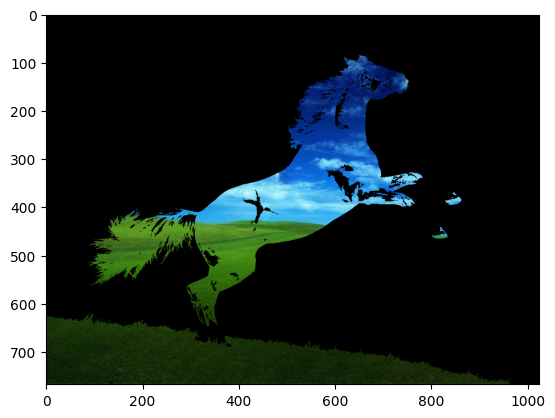

In [7]:
logic_and = bin_not & result
plt.imshow(logic_and)

**8 -** Crie uma função para aplicar o cisalhamento em cima de uma imagem, que **recebe como parâmetro uma imagem, cx e cy**, sendo cx e cy os coeficientes do cisalhamento e retorne a imagem com o efeito aplicado. 
**Aplique a função na imagem anterior com cx=0.3 e cy=0.2**. Mostre o resultado.

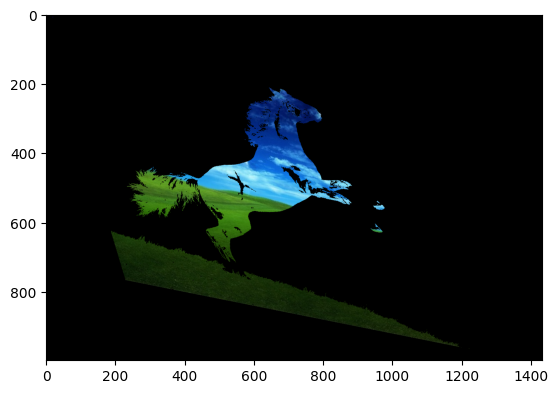

In [8]:
def cisalhamento(img,cx,cy):
    
    (l,c,p) = img.shape
    horse_shear = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
    
    for i in range(l):
        for j in range(c):
            new_x = int(j + cx * i)
            new_y = int(cy * j + i)
            horse_shear[new_y, new_x] = img[i, j]
    return horse_shear
                     
img_cis = cisalhamento(logic_and,0.3,0.2)
plt.imshow(img_cis)

**9 -** Salve a imagem da questão anterior no disco com o nome "resultado.jpg"

In [82]:
Image.fromarray(img_cis).save('resultado.jpg')